In [26]:
from ultralytics import YOLO
import seaborn as sns
import numpy as np
model = YOLO('s70.pt')  

In [21]:
GreyOring = "frame_230.jpg"
RedORing1 = "frame_256.jpg"
YellowOring = "frame_276.jpg"
RedORing2 = "frame_344.jpg"
gr1 = model.predict("images/"+GreyOring,show_labels=False,retina_masks=True, show_conf=False, show_boxes=False)
r1 = model.predict("images/"+RedORing1,show_labels=False, show_conf=False, show_boxes=False)
yel = model.predict("images/"+YellowOring,show_labels=False, show_conf=False, show_boxes=False)
r2 = model.predict("images/"+RedORing2,show_labels=False, show_conf=False, show_boxes=False)
#Взял эталонные кадры каждого кольца


image 1/1 /media/timofeym/hddb5/programming/Python/DataScience&ML/OpenCodeTest/images/frame_230.jpg: 384x640 1 YellowOring, 13.2ms
Speed: 8.7ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /media/timofeym/hddb5/programming/Python/DataScience&ML/OpenCodeTest/images/frame_256.jpg: 384x640 1 YellowOring, 1 GreyOring, 12.5ms
Speed: 3.3ms preprocess, 12.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /media/timofeym/hddb5/programming/Python/DataScience&ML/OpenCodeTest/images/frame_276.jpg: 384x640 1 redOring, 1 YellowOring, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /media/timofeym/hddb5/programming/Python/DataScience&ML/OpenCodeTest/images/frame_344.jpg: 384x640 1 redOring, 1 YellowOring, 1 GreyOring, 12.7ms
Speed: 2.1ms preprocess, 12.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


In [25]:
print(gr1[0].boxes.cls[0], gr1[0].masks.data[0].sum())
print()

print(r1[0].boxes.cls[0], r1[0].masks.data[0].sum())
print(r1[0].boxes.cls[1], r1[0].masks.data[1].sum())
print()

print(yel[0].boxes.cls[0], yel[0].masks.data[0].sum())
print(yel[0].boxes.cls[1], yel[0].masks.data[1].sum())
print()


print(r2[0].boxes.cls[0], r2[0].masks.data[0].sum())
print(r2[0].boxes.cls[1], r2[0].masks.data[1].sum())
print(r2[0].boxes.cls[2], r2[0].masks.data[2].sum())

#Смотрю площади эталонных колец

tensor(1., device='cuda:0') tensor(191987., device='cuda:0')

tensor(2., device='cuda:0') tensor(99345., device='cuda:0')
tensor(1., device='cuda:0') tensor(101681., device='cuda:0')

tensor(0., device='cuda:0') tensor(101522., device='cuda:0')
tensor(1., device='cuda:0') tensor(97198., device='cuda:0')

tensor(2., device='cuda:0') tensor(95506., device='cuda:0')
tensor(1., device='cuda:0') tensor(91507., device='cuda:0')
tensor(0., device='cuda:0') tensor(13352., device='cuda:0')


In [166]:
results = model.predict("/media/timofeym/hddb5/programming/Python/DataScience&ML/OpenCodeTest/video/1e7d9cad-ad5a-4ca5-9d5a-0ca5c4089ddd.avi", stream=True, save=False)

In [ ]:
redMeanArea = 0
rCount = 0
rMax = 0
greyMeanArea = 0
grCount = 0
grMax = 0
yellowMeanArea = 0
yelCount = 0
yelMax = 0
for res in results:
    if len(res.boxes.cls) > 0:
        for i in range(len(res.boxes.cls)):
            if res.boxes.cls[i] == 1:
                area = res.masks.data[i].sum()
                if area > grMax:
                    grMax = area
                grCount += 1
                greyMeanArea += area
            elif res.boxes.cls[i] == 2:
                area = res.masks.data[i].sum()
                if area > rMax:
                    rMax = area
                rCount +=1 
                redMeanArea += res.masks.data[i].sum()
            elif res.boxes.cls[i] == 0:
                area = res.masks.data[i].sum()
                if area > yelMax:
                    yelMax = area
                yelCount +=1 
                yellowMeanArea += res.masks.data[i].sum()
print("YellowMeanArea", yellowMeanArea/yelCount, yelMax)
print("RedMeanArea", redMeanArea/rCount, rMax)
print("greyMeanArea", greyMeanArea/grCount, grMax)

YellowMeanArea tensor(44755.0898, device='cuda:0') tensor(128867., device='cuda:0')
RedMeanArea tensor(65619.4062, device='cuda:0') tensor(100817., device='cuda:0')
greyMeanArea tensor(94485.5156, device='cuda:0') tensor(213794., device='cuda:0') Если брать по всем кадрам


YellowMeanArea tensor(110290.3516, device='cuda:0')
RedMeanArea tensor(88863.8672, device='cuda:0')
greyMeanArea tensor(184272.5469, device='cuda:0') Если брать по 65% от максимальных кадров

In [ ]:
deq = []
for res in results:
    if len(res.boxes.cls) > 0:
        for i in range(len(res.boxes.cls)):
            if res.boxes.cls[i] == 1 and res.masks.data[i].sum() > 170000:
                deq.append(1) # серое кольцо у модели имеет класс 1, даём номер 1
            elif res.boxes.cls[i] == 2 and res.masks.data[i].sum() > 87000:
                deq.append(2) # красное кольцо у модели имеет класс 2, даём номер 2
            elif res.boxes.cls[i] == 0 and res.masks.data[i].sum() > 100000:
                deq.append(3)# желтое кольцо у модели имеет класс 0, даём номер 3
# номера такие выбраны для красивого графика из-за порядка сборки

In [168]:
len(deq)

3839

<Axes: >

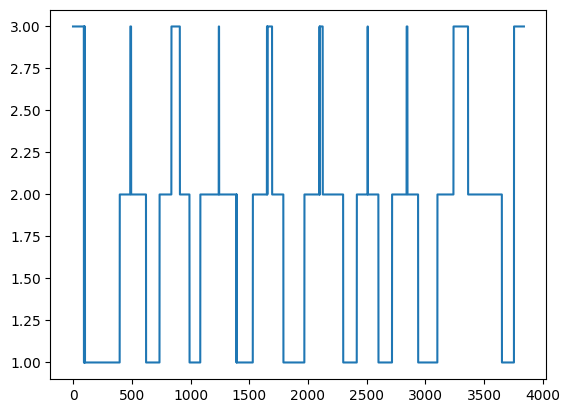

In [169]:
sns.lineplot (x=range(len(deq)), y = deq)

In [171]:
from itertools import groupby
group = [key for key, _group in groupby(deq)] # удаление повторяющихся подряд идущих кадров

<Axes: >

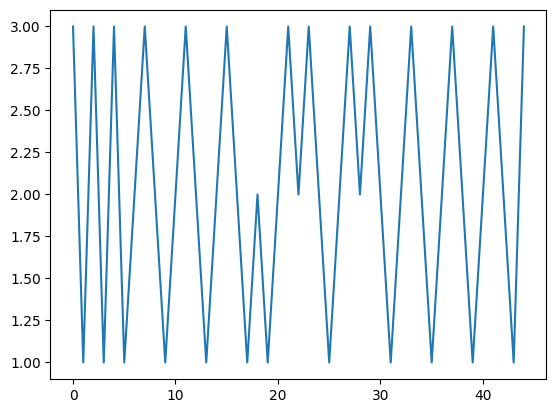

In [172]:
sns.lineplot (x=range(len(group)), y = group)

In [176]:
list(group)
countR = 0
countY = 0
countG = 0

for i in group:
    if i == 2:
        countR+=1
    elif i == 1:
        countG +=1
    elif i == 3:
        countY +=1

print(countY, countG, countR)

14 12 19


In [139]:
len(list(group))

42